* 下文涉及对角度的描述中，1°、1′、1″分别表示角度1度、1分、1秒，1°= 60′= 3600″。
* 数据集涉及GeoTIFF和NetCDF两种格式的文件。这两种文件都可以采用Python和R等开源编程软件处理，也可以采用地理数据处理软件如ArcGIS、GeoScene、SuperMap、QGIS等进行处理。其中QGIS是免费开源的地理信息处理软件，任何人都可下载使用。
* QGIS官方网站：https://qgis.org/
* QGIS教程：https://docs.qgis.org/3.34/en/docs/training_manual/index.html
				https://www.osgeo.cn/qgis-tutorial/index.html（中文教程）

* 1.中国数字高程图（1km）

* 2.中国0.1°近地表气温数据集（1979-2018年）

* 3.中国大陆0.25°逐日降水数据集（1961-2022年）

* 4.中国0.5°土地利用和覆盖变化数据集（1900-2019年）

* 5.中国大陆1km逐年历史人口空间分布公里网格数据集（1990-2015年）

* 6.中国大陆1km逐年历史GDP空间分布公里网格数据集（1990-2015年）

#### 问题1

#### 1.在众多描述地理环境的变量中，一些简单的指标背后蕴藏了深厚的内涵，对人类的生存发展具有重大深远的影响，如大气中二氧化碳的浓度、全球年平均气温等。降水量是一个连续变化的变量，而土地利用/土地覆被类型则是一个存在突变和离散分布的变量。同时，它们都具有时空分布不均匀的特征。请从附件数据中选取相关数据集，为这两个变量分别构建一套描述性统计方法，用1\~3个较为简洁的统计指标或统计图表，对这两个变量在1990~2020年间中国范围内的时空演化特征进行描述和总结。

In [31]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
# 设置字体为 SimHei（黑体）以支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号


#### 函数

In [32]:
def aggregate_precipitation_by_year(precipitation_data, years, agg_func='mean'):
    
    # 找到唯一的年份
    unique_years = np.unique(years)
    
    # 初始化聚合数组 (n_years, lat, lon)
    aggregated_precipitation = np.zeros((len(unique_years), precipitation_data.shape[1], precipitation_data.shape[2]))
    
    # 按年份聚合
    for i, year in enumerate(unique_years):
        mask = (years == year)  # 根据年份筛选数据
        if agg_func == 'sum':
            aggregated_precipitation[i] = np.sum(precipitation_data[mask], axis=0)  # 按年份求和
        elif agg_func == 'mean':
            aggregated_precipitation[i] = np.mean(precipitation_data[mask], axis=0)  # 按年份求平均
        else:
            raise ValueError("聚合函数只支持 'sum' 或 'mean'")
    
    return aggregated_precipitation, unique_years

def img_show(name,image_data,bounds,width,height,style,cmap_wid):
    left, bottom, right, top = bounds
    # 计算图像的网格经纬度
    xs = np.linspace(left, right, width)
    ys = np.linspace(bottom, top, height)
    X, Y = np.meshgrid(xs, ys)

    # 显示 GeoTIFF 图像
    plt.figure(figsize=(10, 6))
    plt.imshow(image_data, cmap=style, extent=[left, right, bottom, top])
    plt.title(name,fontsize = 14)
    plt.xlabel('经度',fontsize = 14)
    plt.ylabel('纬度',fontsize = 14)
    #plt.colorbar(label='降水量')  # 添加标签

    # 获取当前轴
    ax = plt.gca()

    # 使用 make_axes_locatable 创建一个分隔器，控制 colorbar 的位置和大小
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)  # 调整 colorbar 宽度和与图像的间距
    # 添加颜色条
    cbar = plt.colorbar(cax=cax)

    # 设置颜色条的宽高比，使其更短或更长
    cax.set_aspect(cmap_wid)  # 值越大，颜色条越短
#     #plt.savefig(f'问题1\\{name}.png', bbox_inches='tight')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# def img_show(name, image_data, bounds, width, height, style, cmap_wid):
#     left, bottom, right, top = bounds
#     # 计算图像的网格经纬度
#     xs = np.linspace(left, right, width)
#     ys = np.linspace(bottom, top, height)
#     X, Y = np.meshgrid(xs, ys)
# 
#     # 显示图像
#     fig = plt.figure(figsize=(10, 6), facecolor='white')  # 设置背景颜色为白色
#     ax = fig.add_subplot(111)  # 创建子图
#     im = ax.imshow(image_data, cmap=style, extent=[left, right, bottom, top], aspect='auto')
#     ax.set_title(name, fontsize=20)
#     ax.set_xlabel('经度', fontsize=20)
#     ax.set_ylabel('纬度', fontsize=20)
# 
#     # 使用 make_axes_locatable 创建一个分隔器，控制 colorbar 的位置和大小
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)  # 调整 colorbar 宽度和与图像的间距
# 
#     # 添加颜色条
#     cbar = fig.colorbar(im, cax=cax)
# 
#     # 设置颜色条的宽高比，使其更短或更长
#     cbar.ax.set_aspect(cmap_wid)  # 值越大，颜色条越短
#     cbar.set_label('降水量 (mm/day)', fontsize=15)
#     cbar.ax.tick_params(labelsize=15)
# 
#     # 显示图形
#     plt.show()
# def img_show(name, image_data, bounds, width, height, style, cmap_wid):
#     left, bottom, right, top = bounds
#     # 计算图像的网格经纬度
#     xs = np.linspace(left, right, width)
#     ys = np.linspace(bottom, top, height)
#     X, Y = np.meshgrid(xs, ys)
# 
#     # 显示图像
#     fig = plt.figure(figsize=(10, 6), facecolor='none')  # 设置背景颜色为透明
#     ax = fig.add_subplot(111)  # 创建子图
#     ax.set_facecolor('none')  # 设置子图背景颜色为透明
#     im = ax.imshow(image_data, cmap=style, extent=[left, right, bottom, top], aspect='auto', origin='upper')
#     ax.set_title(name, fontsize=20)
#     ax.set_xlabel('经度', fontsize=20)
#     ax.set_ylabel('纬度', fontsize=20)
# 
#     # 使用 make_axes_locatable 创建一个分隔器，控制 colorbar 的位置和大小
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)  # 调整 colorbar 宽度和与图像的间距
#     cax.set_facecolor('none')  # 设置 colorbar 背景颜色为透明
# 
#     # 添加颜色条
#     cbar = fig.colorbar(im, cax=cax)
#     cbar.ax.set_aspect(cmap_wid)  # 值越大，颜色条越短
#     cbar.set_label('降水量 (mm/day)', fontsize=15)
#     cbar.ax.tick_params(labelsize=15)
# 
#     # 显示图形
#     plt.show()
    
###植被数据读写函数
def function(veg):
    ls = []
    for year in years:
        with rasterio.open(f'{file_path}\\{veg}-{year}.tif') as dataset:
            # 读取像素值
            image_data = dataset.read(1)  # 读取第一个波段的数据
            # 获取经纬度信息
            bounds = dataset.bounds
            left, bottom, right, top = bounds
            transform = dataset.transform

            # 获取图像尺寸
            width = dataset.width
            height = dataset.height

            # 计算图像的网格经纬度
            longitude = np.linspace(left, right, width)
            latitude = np.linspace(bottom, top, height)
            ls.append(image_data)
    return np.array(ls),longitude,latitude,bounds,width,height



#### 降水数据集处理

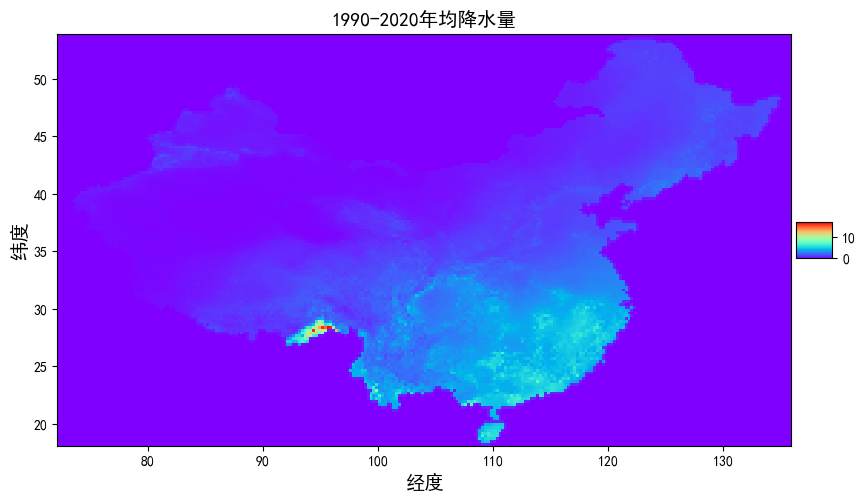

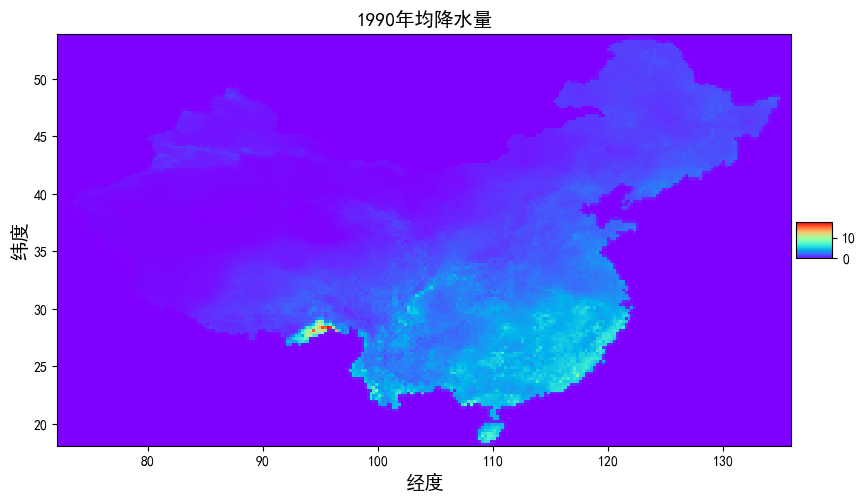

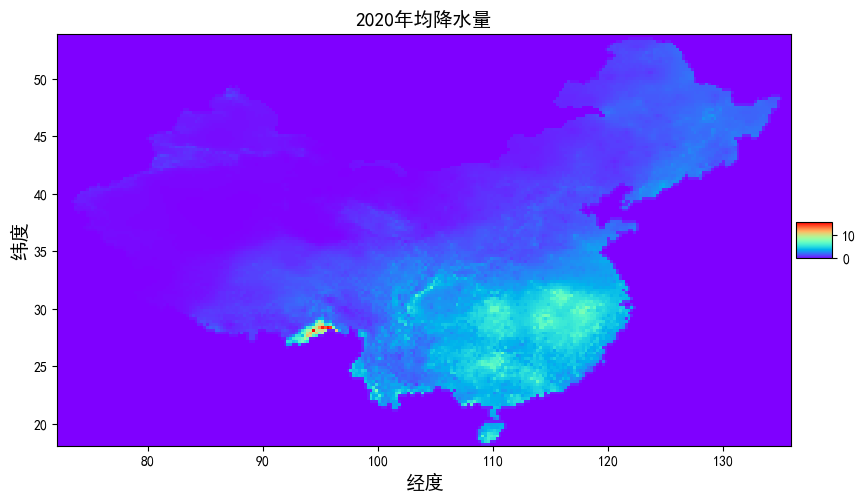

In [33]:
import netCDF4 as nc
import warnings
warnings.filterwarnings("ignore")

file_path = r'F:\huaweibei\CHM_PRE_0.25dg_19612022.nc'
dataset = nc.Dataset(file_path,encoding='gbk')


# 读取变量，时间、纬度、经度和数据变量
time = dataset.variables['time'][:].data
latitude = dataset.variables['latitude'][:].data
longitude = dataset.variables['longitude'][:].data
years = dataset.variables['years'][:].data.tolist()
pre = dataset.variables['pre'][:].data
pre[pre==-9.99e+01] = 0
station_number = dataset.variables['station_number'][:].data

bounds = [longitude.min(),latitude.min(),longitude.max(),latitude.max()]
width = len(longitude)
height = len(latitude)


#计算每个time的实际年份
base_time = datetime(1961, 1, 1, 0, 0, 0)
actual_dates = [(base_time + timedelta(hours=hours)).year for hours in time]
#将天的降水聚合城年降水
sum_pre = aggregate_precipitation_by_year(pre, actual_dates, agg_func='mean')[0]

# 对纬度维度 (第二个维度) 进行上下翻转
sum_pre = np.flip(sum_pre, axis=1)
# 提取1990-2020年的数据
start_index = years.index(1990)
end_index = years.index(2020)

# 计算1990-2020年的年均降水量
mean_annual_precipitation = np.mean(sum_pre[start_index:end_index+1], axis=0)

# 关闭文件
dataset.close()

img_show('1990-2020年均降水量', mean_annual_precipitation, bounds, width, height, 'rainbow', 1)
img_show('1990年均降水量',sum_pre[years.index(1990)],bounds,width,height,'rainbow',1)
img_show('2020年均降水量',sum_pre[years.index(2020)],bounds,width,height,'rainbow',1)

#### 植被数据集处理

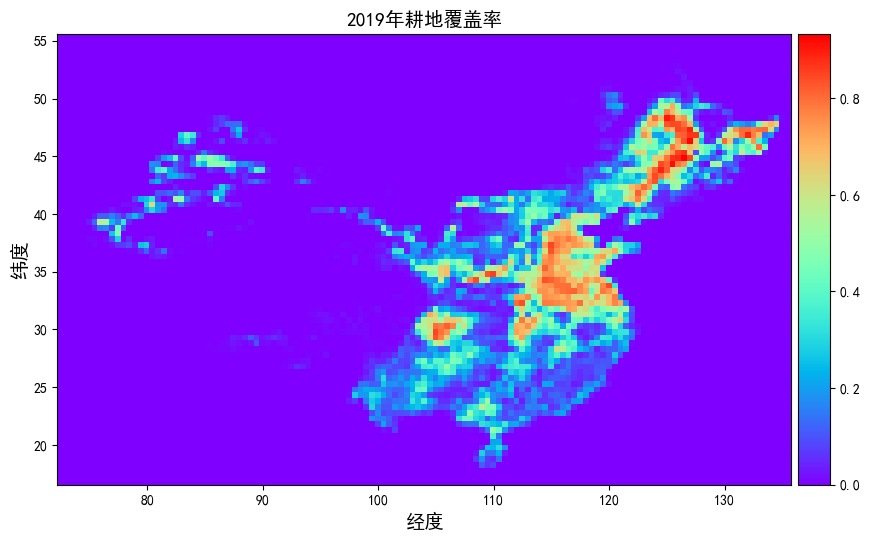

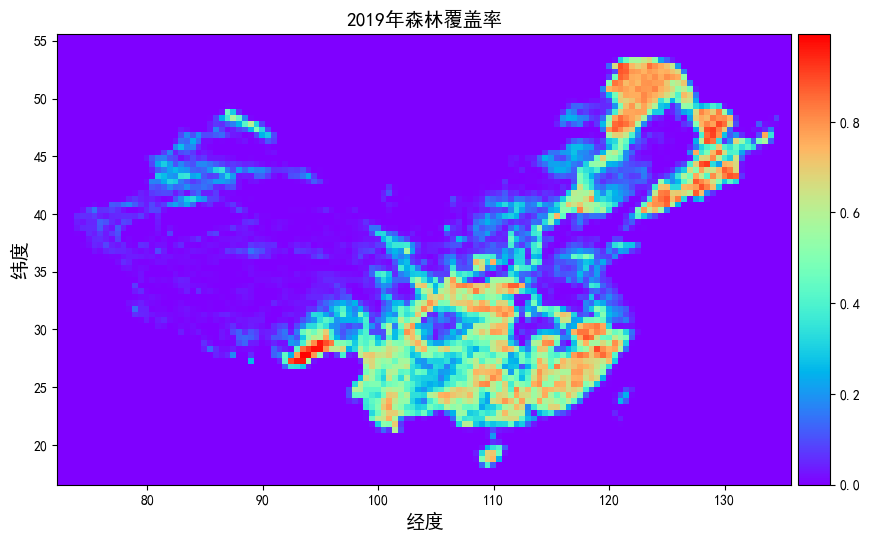

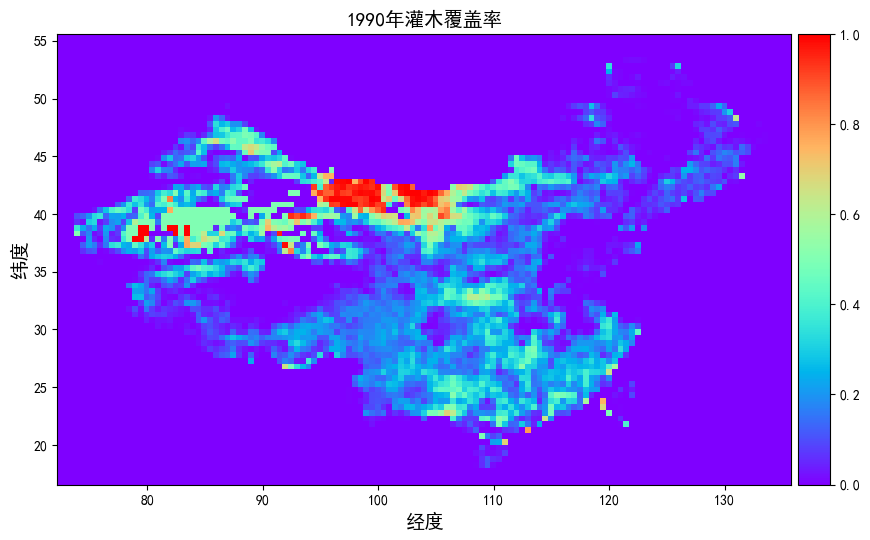

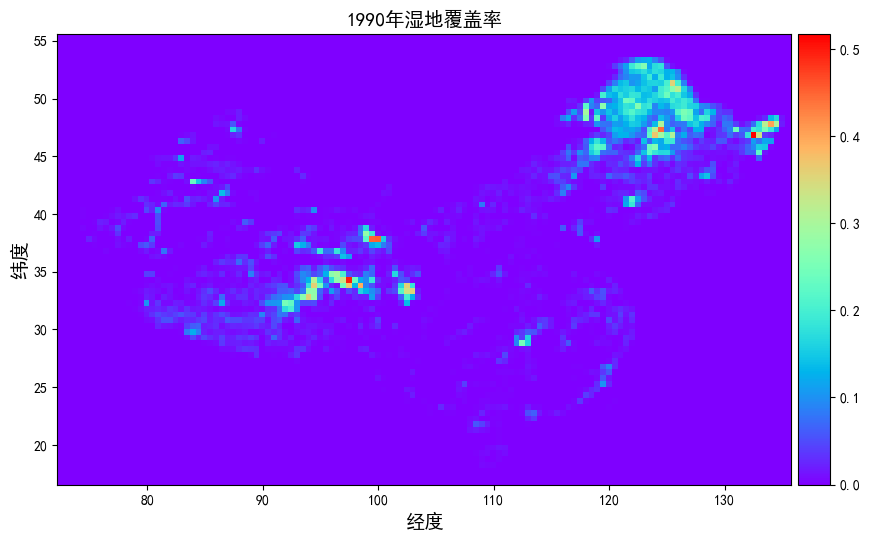

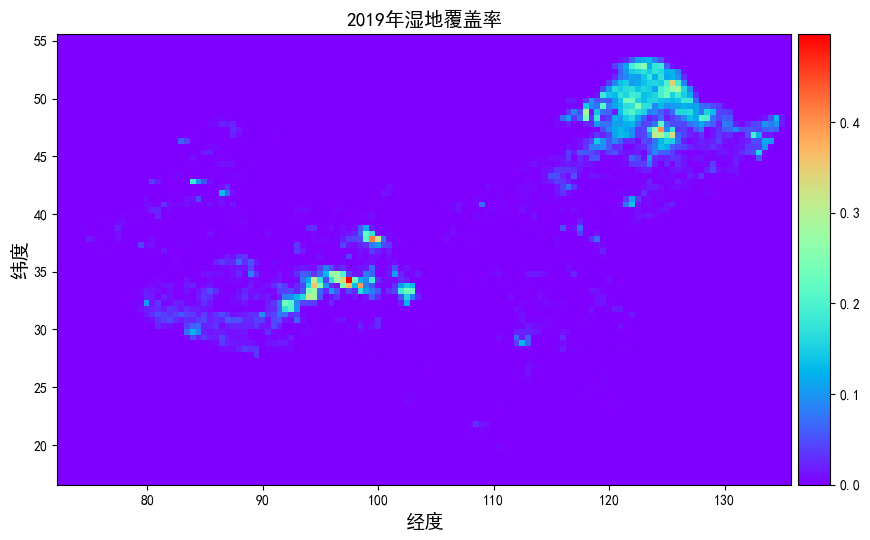

In [34]:
veges = ['cropland','forest','grass','shrub','wetland']
years = list(range(1990,2020))

file_path = r'F:\研究生学习\华为杯\数据集4\中国大陆0.5°土地利用和覆盖变化数据集(1900-2019年)\数据实体'

cropland,longitude,latitude,bounds,width,height = function('cropland')
forest = function('forest')[0]
grass = function('grass')[0]
shrub = function('shrub')[0]
wetland = function('wetland')[0]

img_show('1990年耕地覆盖率',cropland[0],bounds,width,height,'rainbow',14)
img_show('2019年耕地覆盖率',cropland[-1],bounds,width,height,'rainbow',14)

img_show('1990年森林覆盖率',forest[0],bounds,width,height,'rainbow',14)
img_show('2019年森林覆盖率',forest[-1],bounds,width,height,'rainbow',14)

img_show('1990年草地覆盖率',grass[0],bounds,width,height,'rainbow',14)
img_show('2019年草地覆盖率',grass[-1],bounds,width,height,'rainbow',14)

img_show('1990年灌木覆盖率',shrub[0],bounds,width,height,'rainbow',14)
img_show('2019年灌木覆盖率',shrub[-1],bounds,width,height,'rainbow',14)

img_show('1990年湿地覆盖率',wetland[0],bounds,width,height,'rainbow',14)
img_show('2019年湿地覆盖率',wetland[-1],bounds,width,height,'rainbow',14)

#### 解释：可以看到，不管是降水量还是土地覆盖情况，它们的分布都有一定的空间和时间的变化，所以，为了对数据这两个变量进行一个合适的描述性统计，我们需要计算它们的时间和空间特征，因此对不同变量我们各设置一个时间和空间指标进行度量即可


### 1. **时间维度指标：每个时间段的总降水量**

$P_{total}(t_i) = \sum_{x=1}^{m} \sum_{y=1}^{n} P(t_i, x, y)$

其中：
- $P(t_i, x, y)$ 是时间 $t_i$ 在经度$x$，纬度$y$的降水量。
- $m$ 是经度的数量，$n$ 是纬度的数量。
- $P_{total}(t_i)$ 表示在时间 $t_i$ 的总降水量。

### 2. **空间维度指标：空间变异系数（CV）**

$CV_{xy} = \frac{\sigma_{xy}}{\bar{P}_{xy}} \times 100\%$

其中：
- $\sigma_{xy} = \sqrt{\frac{1}{m \times n} \sum_{x=1}^{m} \sum_{y=1}^{n} (P(x, y) - \bar{P}_{xy})^2}$
- $\bar{P}_{xy} = \frac{1}{m \times n} \sum_{x=1}^{m} \sum_{y=1}^{n} P(x, y)$
  
$P(x, y)$ 是在经纬度 $(x, y)$ 位置的降水量，$m$ 和 $n$ 分别是经度和纬度的数量。

### 解读空间变异系数
CV 大（通常超过 50%）：表示降水量在不同空间点之间的变化非常显著。不同地区的降水量差异较大。
CV 小（通常低于 20%）：表示降水量在不同空间点之间的变化较小，空间分布相对均匀。
中间值：表示降水量在空间上有一定程度的变化，但不至于过大。

In [35]:
import numpy as np

#总降水量
def _mean(precipitation_data):
    # 对所有经度和纬度求和，得到每个时间段的总降水量
    ls = []
    for matrix in precipitation_data:
        matrix = matrix[matrix!=0]
        ls.append(matrix.sum())
    return ls
#总空间CV
def _cv(precipitation_data):
    # 对所有经度和纬度求和，得到每个时间段的总降水量
    ls = []
    for matrix in precipitation_data:
        matrix = matrix[matrix!=0]
        ls.append(matrix.std()/matrix.mean())
    return ls

#### 降水量描述性统计

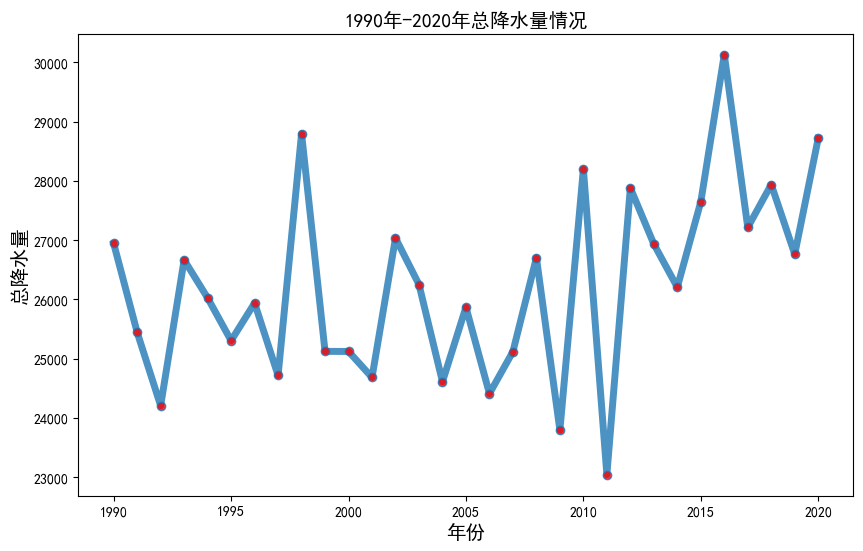

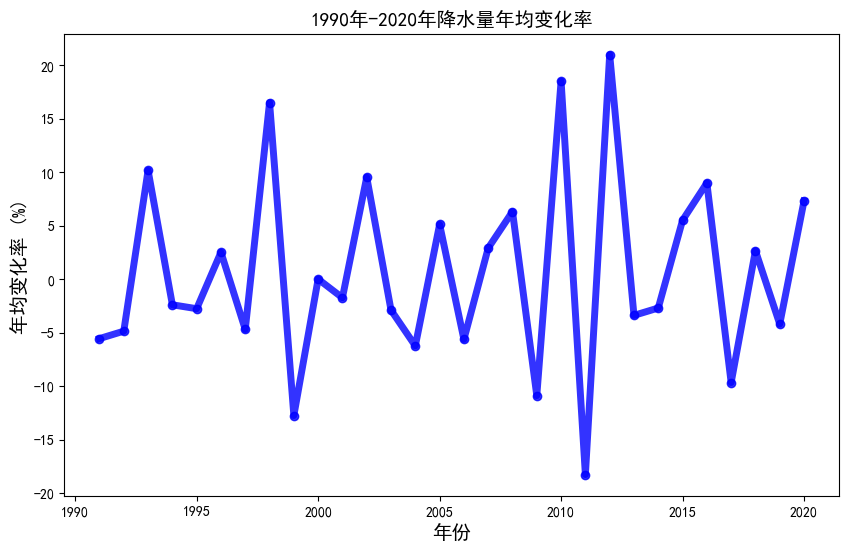

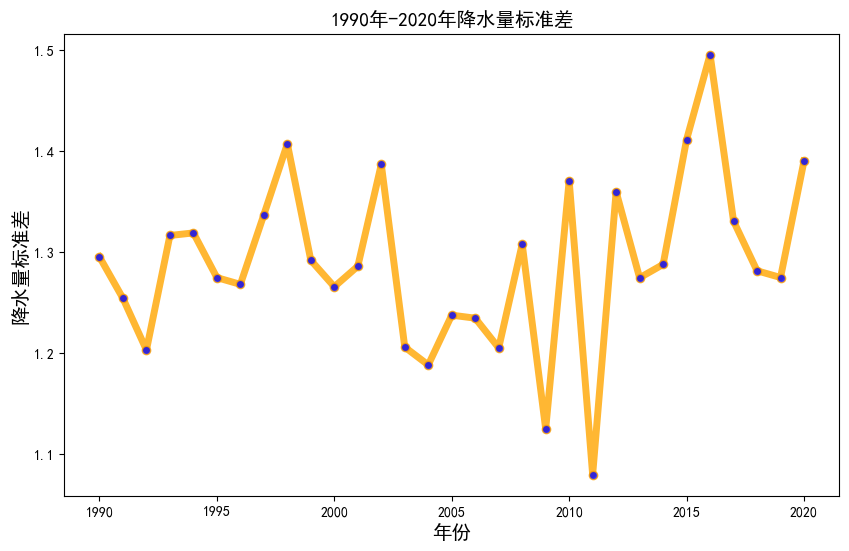

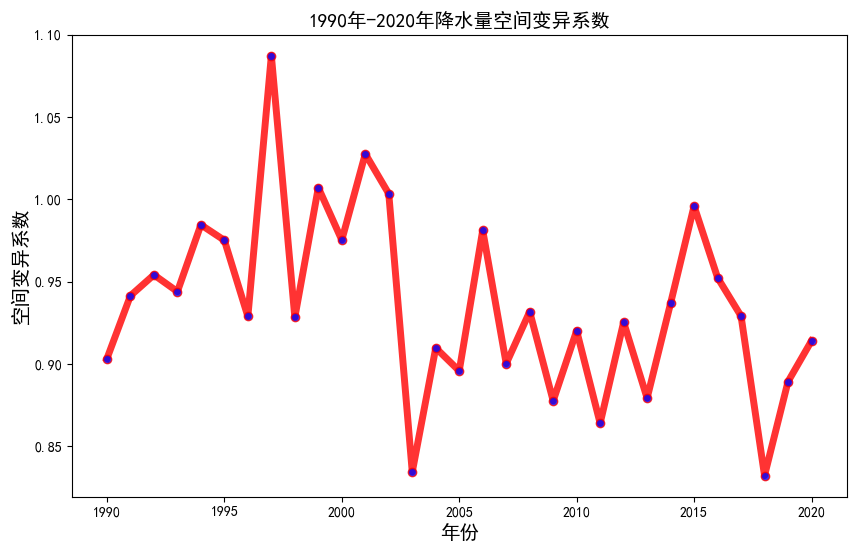

In [41]:
import pandas as pd
import netCDF4 as nc

file_path = r'F:\huaweibei\CHM_PRE_0.25dg_19612022.nc'
dataset = nc.Dataset(file_path,encoding='gbk')


# 读取变量，时间、纬度、经度和数据变量
time = dataset.variables['time'][:].data
latitude = dataset.variables['latitude'][:].data
longitude = dataset.variables['longitude'][:].data
years = dataset.variables['years'][:].data.tolist()
pre = dataset.variables['pre'][:].data
pre[pre==-9.99e+01] = 0
station_number = dataset.variables['station_number'][:].data

bounds = [longitude.min(),latitude.min(),longitude.max(),latitude.max()]
width = len(longitude)
height = len(latitude)


#计算每个time的实际年份
base_time = datetime(1961, 1, 1, 0, 0, 0)
actual_dates = [(base_time + timedelta(hours=hours)).year for hours in time]
#将天的降水聚合城年降水
sum_pre = aggregate_precipitation_by_year(pre, actual_dates, agg_func='mean')[0]

# 对纬度维度 (第二个维度) 进行上下翻转
sum_pre = np.flip(sum_pre, axis=1)
# 提取1990-2020年的数据
start_index = years.index(1990)
end_index = years.index(2020)
pmean = _mean(sum_pre[years.index(1990):years.index(2021)])
pcv = _cv(sum_pre[years.index(1990):years.index(2021)])
annual_stds = np.std(sum_pre[start_index:end_index+1], axis=(1, 2))
result = pd.DataFrame({'year':list(range(1990,2021)),'总降水量':pmean,'降水量空间变异系数':pcv,'降水量标准差': annual_stds})
result.to_excel('F:\研究生学习\华为杯\\降水量描述性统计.xlsx',index=False)
result.index = result['year']


result['总降水量'].plot(kind = "line",figsize = (10,6),linestyle='-',marker='o',markerfacecolor='r',alpha=0.8,linewidth=5) #颜色,matplotlib
plt.xticks(rotation=0)
plt.title('1990年-2020年总降水量情况',fontsize = 14)
plt.xlabel("年份",fontsize = 14)
plt.ylabel("总降水量",fontsize = 14)
plt.savefig('F:\研究生学习\华为杯\\1990年-2020年总降水量情况.png',dpi=500)
plt.show()

# 计算年均变化率
result['年均变化率'] = result['总降水量'].pct_change() * 100  # 百分比形式

# 绘制年均变化率
plt.figure(figsize=(10, 6))
plt.plot(result['year'][1:], result['年均变化率'][1:], c='r', linestyle='-', marker='o', markerfacecolor='b', alpha=0.8,color='blue', linewidth=5)
plt.xticks(rotation=0)
plt.title('1990年-2020年降水量年均变化率', fontsize=14)
plt.xlabel("年份", fontsize=14)
plt.ylabel("年均变化率 (%)", fontsize=14)
plt.savefig(r'F:\研究生学习\华为杯\1990年-2020年降水量年均变化率.png', dpi=500)
plt.show()


# 绘制降水量标准差的变化趋势
plt.figure(figsize=(10, 6))
plt.plot(result['year'], result['降水量标准差'], c='r', linestyle='-', marker='o', markerfacecolor='b', alpha=0.8, color='orange',linewidth=5)
plt.xticks(rotation=0)
plt.title('1990年-2020年降水量标准差', fontsize=14)
plt.xlabel("年份", fontsize=14)
plt.ylabel("降水量标准差", fontsize=14)
plt.savefig('F:\研究生学习\华为杯\\1990年-2020年降水量标准差.png', dpi=500)
plt.show()

result['降水量空间变异系数'].plot(kind = "line",figsize = (10,6),c='r',linestyle='-',marker='o',markerfacecolor='b',alpha=0.8,linewidth=5) #颜色,matplotlib
plt.xticks(rotation=0)
plt.title('1990年-2020年降水量空间变异系数',fontsize = 14)
plt.xlabel("年份",fontsize = 14)
plt.ylabel("空间变异系数",fontsize = 14)
plt.savefig('F:\研究生学习\华为杯\\1990年-2020年降水量空间变异系数.png',dpi=500)
plt.show()

#### 植被描述性统计

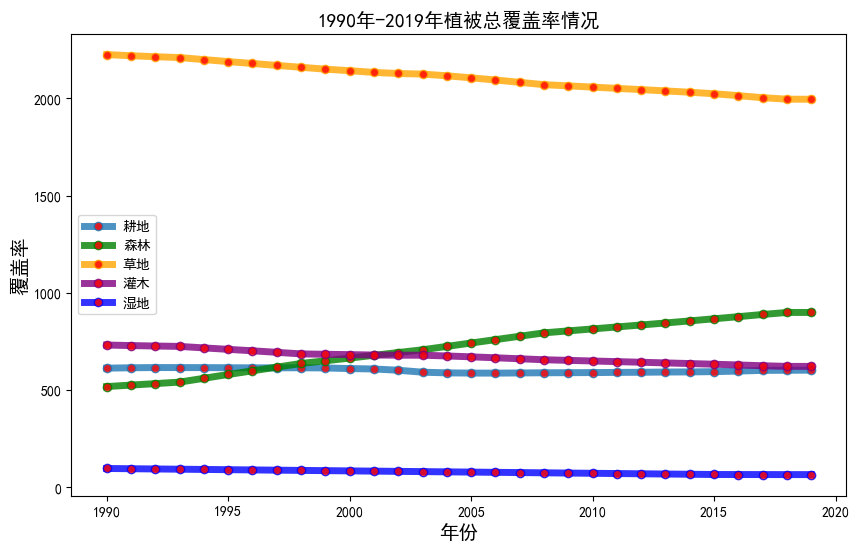

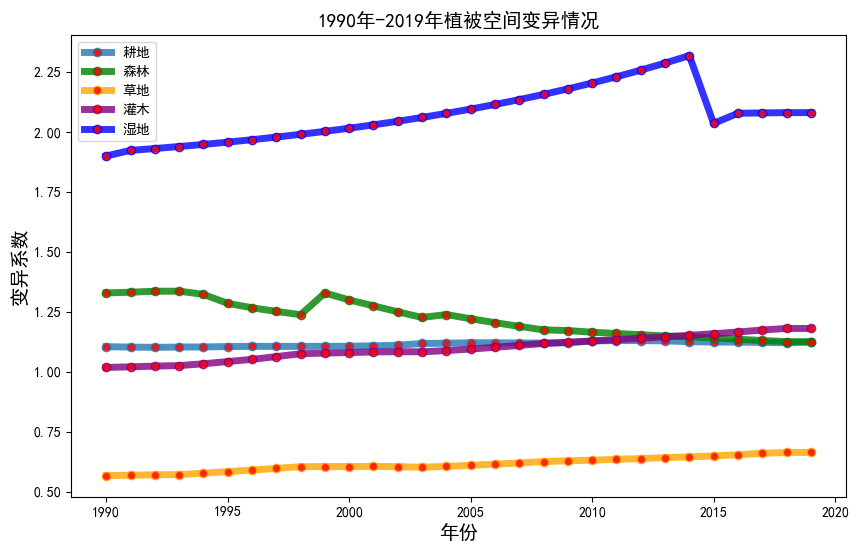

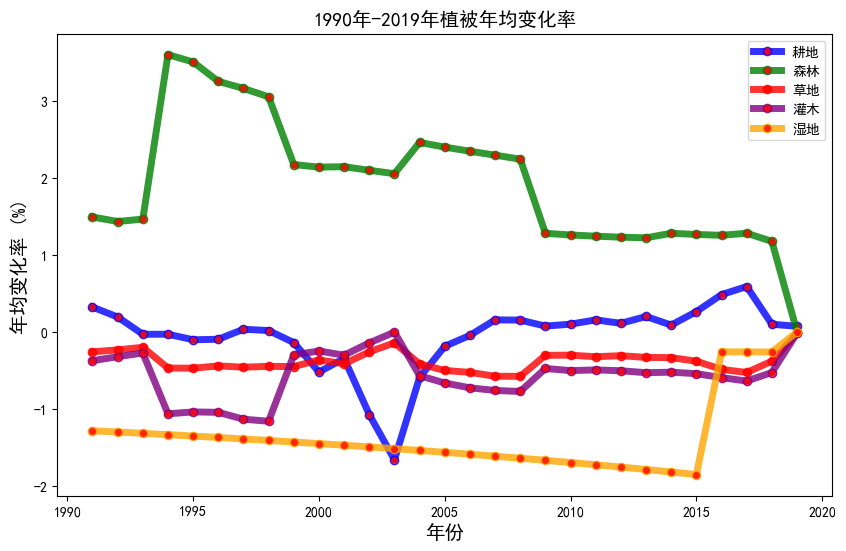

In [37]:
veges = ['cropland','forest','grass','shrub','wetland']
years = list(range(1990,2020))

file_path = r'F:\研究生学习\华为杯\数据集4\中国大陆0.5°土地利用和覆盖变化数据集(1900-2019年)\数据实体'

cropland,longitude,latitude,bounds,width,height = function('cropland')
forest = function('forest')[0]
grass = function('grass')[0]
shrub = function('shrub')[0]
wetland = function('wetland')[0]

pmean = _mean(cropland)
pcv = _cv(cropland)
result = pd.DataFrame({'year':years,'总耕地覆盖率':pmean,'耕地空间变异系数':pcv})

result['总森林覆盖率'] = _mean(forest)
result['森林空间变异系数'] = _cv(forest)

result['总草地覆盖率'] = _mean(grass)
result['草地空间变异系数'] = _cv(grass)

result['总灌木覆盖率'] = _mean(shrub)
result['灌木空间变异系数'] = _cv(shrub)

result['总湿地覆盖率'] = _mean(wetland)
result['湿地空间变异系数'] = _cv(wetland)

result.to_excel('F:\研究生学习\华为杯\\植被描述性统计.xlsx',index=False)
result.index = result['year']


result['总耕地覆盖率'].plot(kind = "line",figsize = (10,6),linestyle='-',marker='o',markerfacecolor='r',alpha=0.8,linewidth=5,label='耕地') #颜色,matplotlib
result['总森林覆盖率'].plot(kind = "line",figsize = (10,6),linestyle='-',marker='o',markerfacecolor='r',alpha=0.8,linewidth=5,color='green',label='森林') #颜色,matplotlib
result['总草地覆盖率'].plot(kind = "line",figsize = (10,6),linestyle='-',marker='o',markerfacecolor='r',alpha=0.8,linewidth=5,color='orange',label='草地') #颜色,matplotlib
result['总灌木覆盖率'].plot(kind = "line",figsize = (10,6),linestyle='-',marker='o',markerfacecolor='r',alpha=0.8,linewidth=5,color='purple',label='灌木') #颜色,matplotlib
result['总湿地覆盖率'].plot(kind = "line",figsize = (10,6),linestyle='-',marker='o',markerfacecolor='r',alpha=0.8,linewidth=5,color='blue',label='湿地') #颜色,matplotlib
plt.xticks(rotation=0)
plt.title('1990年-2019年植被总覆盖率情况',fontsize = 14)
plt.xlabel("年份",fontsize = 14)
plt.ylabel("覆盖率",fontsize = 14)
plt.savefig('F:\研究生学习\华为杯\\1990年-2019年植被总覆盖率情况.png',dpi=500)
plt.legend()
plt.show()

result['耕地空间变异系数'].plot(kind = "line",figsize = (10,6),linestyle='-',marker='o',markerfacecolor='r',alpha=0.8,linewidth=5,label='耕地') #颜色,matplotlib
result['森林空间变异系数'].plot(kind = "line",figsize = (10,6),linestyle='-',marker='o',markerfacecolor='r',alpha=0.8,linewidth=5,color='green',label='森林') #颜色,matplotlib
result['草地空间变异系数'].plot(kind = "line",figsize = (10,6),linestyle='-',marker='o',markerfacecolor='r',alpha=0.8,linewidth=5,color='orange',label='草地') #颜色,matplotlib
result['灌木空间变异系数'].plot(kind = "line",figsize = (10,6),linestyle='-',marker='o',markerfacecolor='r',alpha=0.8,linewidth=5,color='purple',label='灌木') #颜色,matplotlib
result['湿地空间变异系数'].plot(kind = "line",figsize = (10,6),linestyle='-',marker='o',markerfacecolor='r',alpha=0.8,linewidth=5,color='blue',label='湿地') #颜色,matplotlib
plt.xticks(rotation=0)
plt.title('1990年-2019年植被空间变异情况',fontsize = 14)
plt.xlabel("年份",fontsize = 14)
plt.ylabel("变异系数",fontsize = 14)
plt.savefig('F:\研究生学习\华为杯\\1990年-2019年植被空间变异情况.png',dpi=500)
plt.legend()
plt.show()

# 计算年均变化率
result['耕地年均变化率'] = result['总耕地覆盖率'].pct_change() * 100
result['森林年均变化率'] = result['总森林覆盖率'].pct_change() * 100
result['草地年均变化率'] = result['总草地覆盖率'].pct_change() * 100
result['灌木年均变化率'] = result['总灌木覆盖率'].pct_change() * 100
result['湿地年均变化率'] = result['总湿地覆盖率'].pct_change() * 100

# 绘制年均变化率
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']
labels = ['耕地', '森林', '草地', '灌木', '湿地']
for veg, color, label in zip(['耕地年均变化率', '森林年均变化率', '草地年均变化率', '灌木年均变化率', '湿地年均变化率'], colors, labels):
    result[veg][1:].plot(kind="line", linestyle='-', marker='o', markerfacecolor='r', alpha=0.8, linewidth=5, color=color, label=label)
plt.xticks(rotation=0)
plt.title('1990年-2019年植被年均变化率', fontsize=14)
plt.xlabel("年份", fontsize=14)
plt.ylabel("年均变化率 (%)", fontsize=14)
plt.legend()
plt.savefig('F:\研究生学习\华为杯\\1990年-2019年植被年均变化率.png', dpi=500)
plt.show()


In [38]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np

# 读取 GeoTIFF 文件
file_path = r'F:\研究生学习\华为杯\数据集2\中国0.1°近地表日平均气温数据集(1979-2018年)\2003_avg\20030609_avg.tif'
with rasterio.open(file_path) as dataset:
    # 读取像素值
    image_data = dataset.read(1)  # 读取第一个波段的数据
    image_data[image_data<-1000] = 0
    # 获取经纬度信息
    bounds = dataset.bounds
    left, bottom, right, top = bounds
    transform = dataset.transform

    # 获取图像尺寸
    width = dataset.width
    height = dataset.height

    # 计算图像的网格经纬度
    xs = np.linspace(left, right, width)
    ys = np.linspace(bottom, top, height)
    X, Y = np.meshgrid(xs, ys)

    # 显示 GeoTIFF 图像
    plt.figure(figsize=(10, 10))
    plt.imshow(image_data, cmap='gray', extent=[left, right, bottom, top])
    plt.colorbar(label='Pixel Value')
    plt.title('GeoTIFF Image with Geographic Coordinates')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


RasterioIOError: F:/研究生学习/华为杯/数据集2/中国0.1°近地表日平均气温数据集(1979-2018年)/2003_avg/20030609_avg.tif: No such file or directory

In [ ]:
left